# Modeling

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, f1_score, make_scorer, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#with open('/content/drive/My Drive/Colab Notebooks/mdi_df_yr_trail.csv', 'r') as data:
#  noaa_on_fire = pd.read_csv(data)

In [ ]:
noaa_on_fire =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/mdi_df_yr_trail.csv')

In [ ]:
noaa_on_fire = pd.get_dummies(noaa_on_fire, columns=['state', 'month'], drop_first= True)

In [ ]:
noaa_on_fire.columns

In [ ]:
noaa_on_fire['stat_cause_descr'].unique()
not_stupidity = ['Miscellaneous',  'Railroad', 'Powerline', 'Lightning', 'Missing/Undefined', 'Fireworks']
noaa_on_fire['caused_by_stupidity'] = noaa_on_fire['stat_cause_descr'].apply(lambda x: 0 if x in not_stupidity else 1)
noaa_on_fire['caused_by_stupidity'].sum()

In [ ]:
noaa_on_fire = noaa_on_fire[noaa_on_fire['caused_by_stupidity'] == 0]

In [ ]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t3m', 'pcp_t12m', 'pmdi_t12m']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

In [ ]:
y = noaa_on_fire['fire_size']

X = noaa_on_fire[X_vars]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

REGRESSION

In [ ]:
lr = LinearRegression()
lasso = Lasso()

In [ ]:
for q in [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    print(f"Using data corresponding to fire size > {q} quantile:")
    noaa_on_fire = noaa_on_fire[noaa_on_fire['fire_size']> noaa_on_fire['fire_size'].quantile(q)]
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    stan = StandardScaler()
    X_train = stan.fit_transform(X_train)
    X_test = stan.transform(X_test)
    
    lr = LinearRegression()
    lasso = Lasso()
    
    lr.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    print(f"Linear Regression achieves R2 of {round(lr.score(X_train, y_train),4)} on train data and {round(lr.score(X_test, y_test),4)} on test data.")
    print(f"Lasso Regression achieves R2 of {round(lasso.score(X_train, y_train),4)} on train data and {round(lasso.score(X_test, y_test),4)} on test data.\n")

Note: best LR with all quantiled data has R2 of 0.0016

CLASSIFICATION

In [ ]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X = noaa_on_fire[X_vars]
y = noaa_on_fire['fire_size_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [ ]:
logr = LogisticRegression(max_iter = 10000)
logr.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr.score(X_train, y_train),4)} on train data and {round(logr.score(X_test, y_test),4)} on test data.")


In [ ]:
recall_score(y_train, logr.predict(X_train), average = 'weighted')

In [ ]:
plot_confusion_matrix(logr, X_test, y_test, cmap = 'YlOrBr', normalize= 'true');

REGRESSION WITH BOOTSTRAPPING

Adding more representation of classes C, D, ..., G by including re-sampled observations with fire_size > 10 (which corresponds to those under-represented classes)

In [ ]:
noaa_on_fire_btstrp = pd.concat([noaa_on_fire, 
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'C'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'D'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'E'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'F'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'G'].sample(n = 100000, replace = True, random_state=11)], axis = 0)

In [ ]:
noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
X = noaa_on_fire_btstrp[X_vars]
y = noaa_on_fire_btstrp['fire_size_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [ ]:
logr_b = LogisticRegression(max_iter = 10000)
logr_b.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr_b.score(X_train, y_train),4)} on train data and {round(logr_b.score(X_test, y_test),4)} on test data.")

In [ ]:
plot_confusion_matrix(logr_b, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

Applying class weights to stress importance of G, F, E, D relative to smaller fires

In [ ]:
LogisticRegression(class_weight = {'A':0.05, 'B': 0.05, 'C': 0.05, 'D': 0.1, 'E': 0.2, 'F': 0.25, 'G': 0.3},  max_iter = 10000, verbose = 1)
logr_w = LogisticRegression(max_iter = 10000)
logr_w.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr_w.score(X_train, y_train),4)} on train data and {round(logr_w.score(X_test, y_test),4)} on test data.")

In [ ]:
f1_score(y_train, logr_w.predict(X_train), average = 'weighted')

In [ ]:
print(f"Logistic Regression achieves recall of {round(recall_score(y_train, logr_w.predict(X_train), average = 'weighted'),4)} on train data and {round(recall_score(y_test, logr_w.predict(X_test), average = 'weighted'),4)} on test data.")

In [ ]:
plot_confusion_matrix(logr_w, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

Tuning parameters to improve accuracy (recall?) - *couldn't afford to let this run to completion...*

In [ ]:
logr_w.get_params

In [ ]:
params= {
    'C': np.linspace(0,1,5), 
    'solver': ['lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],
}

In [ ]:
logr_gs = GridSearchCV(logr_w, param_grid = params, cv = 5, verbose = 1, n_jobs = -1 )
logr_gs.fit(X_train, y_train)

Changing the objective to "large" fires:

In [ ]:
noaa_on_fire_btstrp['large'] = noaa_on_fire_btstrp['fire_size'].apply(lambda x: 1 if x > 100 else 0)

In [ ]:
y = noaa_on_fire_btstrp['large']

X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
X = noaa_on_fire_btstrp[X_vars]

In [ ]:
large_gts = [5, 10, 100, 300, 1000]

for l in large_gts:
    noaa_on_fire_btstrp['large'] = noaa_on_fire_btstrp['fire_size'].apply(lambda x: 1 if x > l else 0)

    y = noaa_on_fire_btstrp['large']

    X_vars = ['state_CA', 'state_CO', 'state_ID',
           'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
           'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
           'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
           'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
           'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
           'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
    
    X = noaa_on_fire_btstrp[X_vars]

    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

    stan = StandardScaler()
    X_train = stan.fit_transform(X_train)
    X_test = stan.transform(X_test)

    logr_b = LogisticRegression(max_iter = 10000)
    logr_b.fit(X_train, y_train)
    print(f"When detecting fires > {l} acres, Logistic Regression achieves accuracy of {round(logr_b.score(X_train, y_train),4)} on train data and {round(logr_b.score(X_test, y_test),4)} on test data.")
    print(f"The model's recall is {round(recall_score(y_train, logr_b.predict(X_train)),4)} on train data and {round(recall_score(y_test, logr_b.predict(X_test),4))} on test data.\n")

In [ ]:
plot_confusion_matrix(logr_b, X_test, y_test,cmap = 'YlOrBr');

In [ ]:
recall_score(y_test, logr_b.predict(X_test))

SVM

In [ ]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X = noaa_on_fire_btstrp[X_vars]
y = noaa_on_fire_btstrp['fire_size_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
print(f"Support Vector Classifier achieves accuracy of {round(svc.score(X_train, y_train),4)} on train data and {round(svc.score(X_test, y_test),4)} on test data.")

In [ ]:
plot_confusion_matrix(svc, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

## Jesse ---------------------------------------------------------

## Prepare Dataset

### Imports

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
np.random.seed(42) 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, f1_score, make_scorer, precision_score

### Read raw dataset

In [2]:
# read dataset
model_df = pd.read_csv('data/mfi_df_yr.csv')

# Drop Unnamed: 0
model_df.drop('Unnamed: 0', axis=1, inplace=True)

#examine
model_df.head(3)

,fire_year,stat_cause_descr,fire_size,fire_size_class,state,cont_date_fixed,disc_date_fixed,time_burnt_fixed,time_burnt,month,...,cdd,hdd,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax
0,2005,Miscellaneous,0.10,A,CA,2005-02-02,2005-02-02,0 days 00:00:00.000000000,0.0,2,...,0,421,0.58,0.85,1.00,0.92,0.24,0.48,38.1,56.1
1,2004,Lightning,0.25,A,CA,2004-05-12,2004-05-12,0 days 00:00:00.000000000,0.0,5,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2
2,2004,Debris Burning,0.10,A,CA,2004-05-31,2004-05-31,0 days 00:00:00.000000000,0.0,5,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2


### Bootstrap

In [3]:
#credit to Marta
model_df = pd.concat([model_df, 
                                 model_df[model_df['fire_size_class'] == 'C'].sample(n = 100000, replace = True, random_state=42),
                                 model_df[model_df['fire_size_class'] == 'D'].sample(n = 100000, replace = True, random_state=42),
                                 model_df[model_df['fire_size_class'] == 'E'].sample(n = 100000, replace = True, random_state=42),
                                 model_df[model_df['fire_size_class'] == 'F'].sample(n = 100000, replace = True, random_state=42),
                                 model_df[model_df['fire_size_class'] == 'G'].sample(n = 100000, replace = True, random_state=42)],
                     axis = 0)

### One hot encode variables

In [4]:
model_df = pd.get_dummies(model_df, columns=['month'], drop_first=True) # in relation to January
model_df = pd.get_dummies(model_df, columns=['statecode'], drop_first=True) # location matters

In [5]:
model_df.columns

Index(['fire_year', 'stat_cause_descr', 'fire_size', 'fire_size_class',
       'state', 'cont_date_fixed', 'disc_date_fixed', 'time_burnt_fixed',
       'time_burnt', 'year', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi',
       'phdi', 'zndx', 'pmdi', 'cdd', 'hdd', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'statecode_4', 'statecode_5', 'statecode_10',
       'statecode_24', 'statecode_26', 'statecode_29', 'statecode_35',
       'statecode_45', 'statecode_110'],
      dtype='object')

### Create X, y and train, test 

In [6]:
model_df['fire_size_class'].value_counts()

A    258392
C    123168
B    121465
D    106412
E    104733
F    103801
G    102196
Name: fire_size_class, dtype: int64

In [7]:
#I don't want to dummy neighboorhood, but I do want to bin it into oridinal columns based on mean price
model_df['fire_size_class_order'] = model_df['fire_size_class']
model_df_ordinal_str_columns = model_df[['fire_size_class_order']]

dict_ordinal = {
    'A': 1,
    'B' : 1,
    'C' : 2,
    'D': 2,
    'E' : 2,
    'F' : 3,
    'G' : 3,
      }

#loop to get the job done
for i in model_df_ordinal_str_columns.columns:
    model_df.replace({i: dict_ordinal},inplace = True)

In [8]:
#create X and y variables
X = model_df[[ 'pcp', 'tavg', 'pdsi', 'phdi', 'zndx', 'pmdi', 'sp02',
       'sp03', 'sp06', 'sp09', 'sp12', 'sp24', 'tmin', 'tmax', 'month_2', 'month_3',
       'month_4', 'month_5', 'cdd', 'hdd','month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12','statecode_4', 'statecode_5', 'statecode_10',
       'statecode_24', 'statecode_26', 'statecode_29', 'statecode_35',
       'statecode_45', 'statecode_110']]
y = model_df[['fire_size_class_order']]

assert len(X) == len(y)

#split into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8, stratify = y)

In [9]:
# prepare y for confusion matrix
y_train_con = y_train
y_test_con = y_test

# prepare y for multiclass modeling
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(736133, 4)

### Standardize data

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### OPTION: Add polynomial features to capture non-linear relationships

In [12]:
transform = PolynomialFeatures(degree=2)
X_train_sc = transform.fit_transform(X_train_sc)
X_test_sc = transform.fit_transform(X_test_sc)

### OPTION: Principle Component Analysis to reduce dimensionality of polynomial features

Explained variance (first 30 components): [0.171 0.111 0.075 0.058 0.038 0.033 0.028 0.024 0.021 0.017 0.016 0.016
 0.014 0.013 0.012 0.011 0.009 0.009 0.008 0.008]

Cumulative explained variance (first 30 components): [0.171 0.283 0.357 0.415 0.453 0.486 0.514 0.539 0.56  0.578 0.594 0.609
 0.623 0.635 0.647 0.658 0.667 0.676 0.685 0.693]


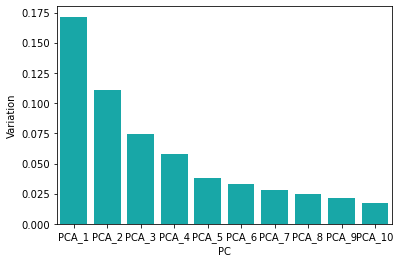

In [13]:
#NOTE: this method (bootstrap + polynomial features + PCA) increases linear regression r^2 score from .001 to .06 which is a marked improvement. 

# Instantiate PCA with 30 components.
pca = PCA(n_components=30, random_state=42)

# Fit PCA to training data.
pca.fit(X_train_sc)

# Transform Z_train and Z_test.
X_train_sc = pca.transform(X_train_sc)
X_test_sc = pca.transform(X_test_sc)

# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 30 components): {np.round(var_exp[:20], 3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 30 components): {np.round(cum_var_exp[:20], 3)}')

columns = [f'PCA_{i+1}' for i in pd.DataFrame(X_train_sc).columns]
var_ratio_df = pd.DataFrame({'Variation':var_exp,
             'PC':columns})
var_ratio_df.head()
sns.barplot(x=var_ratio_df['PC'].head(10) ,y=var_ratio_df['Variation'].head(10), 
           data=var_ratio_df, color="c");

# Model

### Network Topology

In [17]:
#instantiate model
model = Sequential()

#input layer
n_input = X_train_sc.shape[1]

#dense layers
model.add(Dense(n_input, 
                input_dim=n_input,
                activation='relu',
                kernel_regularizer=l2(0.001)))
model.add(Dense(24, 
                input_dim=n_input,
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, 
                input_dim=n_input,
                activation='relu',
                ))
model.add(Dropout(0.2))

#output layer
model.add(Dense(4, activation='softmax'))

### Compile

In [18]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit

In [19]:
#fit model to dataset
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=64)

Epoch 1/50
11503/11503 [==============================] - 15s 1ms/step - loss: 1.0954 - accuracy: 0.4424 - val_loss: 1.0098 - val_accuracy: 0.4836
Epoch 2/50
11503/11503 [==============================] - 15s 1ms/step - loss: 1.0168 - accuracy: 0.4736 - val_loss: 1.0032 - val_accuracy: 0.4843
Epoch 3/50
11503/11503 [==============================] - 13s 1ms/step - loss: 1.0116 - accuracy: 0.4762 - val_loss: 0.9996 - val_accuracy: 0.4900
Epoch 4/50
11503/11503 [==============================] - 13s 1ms/step - loss: 1.0094 - accuracy: 0.4800 - val_loss: 1.0029 - val_accuracy: 0.4889
Epoch 5/50
11503/11503 [==============================] - 13s 1ms/step - loss: 1.0084 - accuracy: 0.4808 - val_loss: 0.9998 - val_accuracy: 0.4883
Epoch 6/50
11503/11503 [==============================] - 13s 1ms/step - loss: 1.0079 - accuracy: 0.4816 - val_loss: 1.0008 - val_accuracy: 0.4890
Epoch 7/50
11503/11503 [==============================] - 15s 1ms/step - loss: 1.0084 - accuracy: 0.4795 - val_loss: 0

### Model loss

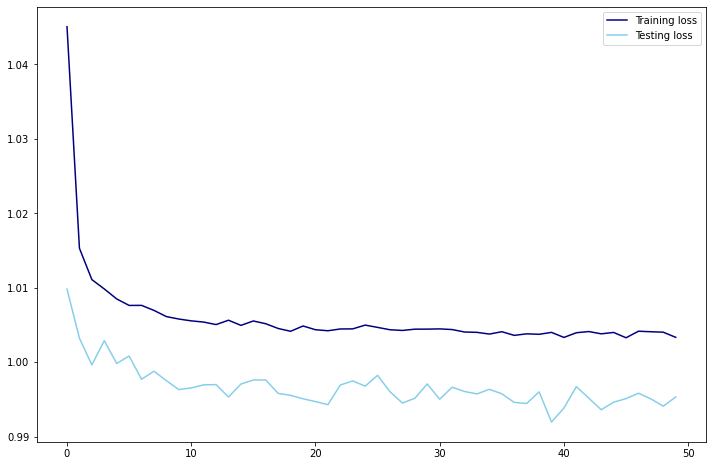

In [20]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Accuracy

In [21]:
history.history['accuracy'][-1],history.history['val_accuracy'][-1]

(0.48186808824539185, 0.4911429286003113)

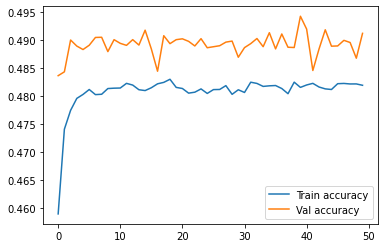

In [22]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

### Recall

In [23]:
#[None, 'micro', 'macro', 'weighted']
recall_score(y_test_con, model.predict_classes(X_test_sc), average = None)

C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0.73129574, 0.37017484, 0.24461759])

### Confusion Matrix

In [24]:
y_pred=model.predict_classes(X_test_sc)

In [25]:
con_mat = tf.math.confusion_matrix(labels=y_test_con, predictions=y_pred).numpy()

In [26]:
#classes = ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
classes = ['0', 'Small', 'Medium', 'Big']

In [27]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

con_mat_df_values = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)

<ipython-input-27-5f2801a7b30b>:1: RuntimeWarning: invalid value encountered in true_divide
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


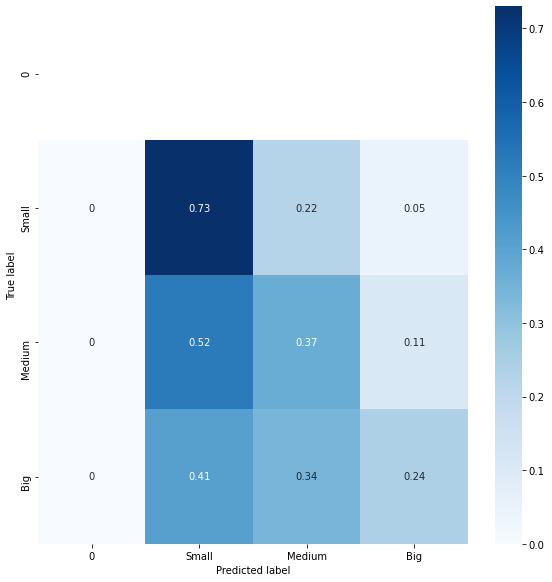

In [28]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
mfi_df = pd.read_csv('data/mfi_df_yr.csv')
mfi_df.head()

In [ ]:
mfi_df.columns

In [ ]:
list(mfi_df.columns.values)

In [ ]:
# Drop the `Unnamed: 0` column.
mfi_df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop NAs.
# df.dropna(inplace=True)

In [ ]:
# Create dummies for the `ChestPain`, `Thal`, and `AHD` columns.
# Be sure to set `drop_first=True`.
mfi_df = pd.get_dummies(mfi_df,
                    columns=['stat_cause_descr', 'state'],
                    drop_first=True)

In [ ]:
mfi_df.drop(columns=['fire_year', 'cont_date_fixed', 
                        'disc_date_fixed', 'time_burnt', 
                        'statecode',
                        'division', 'yearmonth'],
                        axis = 1,
                        inplace = True)

In [ ]:
mfi_df.head()

In [ ]:
# Define X and y.
X = mfi_df.drop(columns=['fire_size']).select_dtypes(include=['float64'])
y = mfi_df['fire_size'].to_numeric()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                   )

In [ ]:
# What is the accuracy of our baseline model?
y.value_counts(normalize=True)

In [ ]:
# Instantiate `RandomForestClassifier` object.
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)

rf.fit(X_train, y_train)

In [ ]:
# Fit and score on the training data.
cross_val_score(rf, X_train, y_train, cv=5).mean()

In [ ]:
# Fit and score on the training data.
cross_val_score(et, X_train, y_train, cv=5).mean()

In [ ]:
# Score on the testing data.
tree.score(X_test, y_test)

In [ ]:
# Generate one bootstrapped sample
# of size n from X_train.

X_train.sample(n = X_train.shape[0],
               replace = True,
               random_state = 42)

def bootstrap(data, num_B):
    # Create empty list for output.
    output = []
    
    # Generate num_B bootstrapped samples.
    for B in range(num_B):
        
        # Each sample is sampled from data with
        # the same sample size as the original
        # data, and samples with replacement.
        bootstrapped_sample = data.sample(n = data.shape[0],
                                        replace = True)
        
        # Append sample to list.
        output.append(bootstrapped_sample)
        
    # Returns num_B bootstrapped samples in list.
    return output

# Adapted from Boom D. - NYC


In [ ]:
# Set seed for reproducibility.
np.random.seed(42)

# Generate five bootstrapped samples from X_train.
boot_samp = bootstrap(X_train, 5)

# Plot cholesterol level for each bootstrapped sample.
for B in range(5):
    plt.figure(figsize = (9,6))
    plt.hist(boot_samp[B]['Chol'])
    plt.title(f'Bootstrapped Sample {B + 1} of Cholesterol Level');